## Imports

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry
from gasmarketmodel.params import europe_frame

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [22]:
# label/sheet name : total_row_switch, row offset, index columns
output_dict = {
    "Mapping" : [False, -4, 0],
    "Demand" : [True, 0, 0],
    "Production" : [True, 0, 0],
    "Price" : [False, 0, 0],
    "LNG" : [True, 8, [0, 1, 2]],
    "Piped Imports" : [True, 12, [0, 1, 2]],
    #"Piped Exports" : [True, 12, [0, 1, 2]],
    "Connections" : [False, 12, [0, 1, 2]],
    "Supply Mix" : [False, 11, [0, 1]]
}

output_df_dict = {}

# Border color
edgecolor = "black"
# Color scheme
cmap = "cool"
# Line width
linewidth = 1

country_names = {
    "Deutschland" : "Germany",
    "Niederlande" : "Netherlands",
    "Frankreich" : "France",
    "Schweiz" : "Switzerland",
    "Luxemburg" : "Luxembourg",
    "Belgien" : "Belgium",
    "Spanien" : "Spain",
    "Portugal" : "Portugal",
    "Italien" : "Italy",
    "Österreich" : "Austria",
    "Schweden" : "Sweden",
    "Finnland" : "Finland",
    "Dänemark" : "Denmark",
    "Polen" : "Poland",
    "Tschechien" : "Czechia",
    "Slowakei" : "Slovakia",
    "Litauen" : "Lithuania",
    "Lettland" : "Latvia",
    "Estland" : "Estonia",
    "Ungarn" : "Hungary",
    "Slowenien" : "Slovenia",
    "Kroatien" : "Croatia",
    "Rumänien" : "Romania",
    "Bulgarien" : "Bulgaria",
    "Griechenland" : "Greece",
    "Irland" : "Ireland",
    "UK" : "United Kingdom",
    "Malta" : "Malta",
    "Zypern" : "Cyprus",
    "Ukraine" : "Ukraine"
}

importers_list = [
    "Algerien",
    "Libyen",
    "Norwegen",
    "Russland"
]

## Data from Excel

In [29]:
output_df_dict

{}

In [7]:
for output_metric, output_params in output_dict.items():
    output_df_dict[output_metric] = pd.read_excel(
        io = "../gasmarketmodel/data/outputs/countries.xlsx",
        sheet_name = output_metric,
        skiprows = 4 + output_params[1],
        index_col = output_params[2]
    )
    # Drop Total row
    if output_params[0]:
        output_df_dict[output_metric].drop("Total", inplace = True)

/home/flo/.pyenv/versions/3.8.6/envs/gasmarketmodel/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## Map Data

In [24]:
pd.DataFrame(importers_list, columns = ["Country"])

,Country
0,Algerien
1,Libyen
2,Norwegen
3,Russland


/home/flo/.pyenv/versions/3.8.6/envs/gasmarketmodel/lib/python3.8/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.overlay(


,geometry
index,
Zypern,"MULTIPOLYGON (((33.91052 35.05740, 33.92147 35..."
Frankreich,"MULTIPOLYGON (((8.57407 42.21992, 8.56577 42.2..."
Ukraine,"MULTIPOLYGON (((31.82584 52.10406, 31.85871 52..."
Litauen,"MULTIPOLYGON (((26.60383 55.64327, 26.60766 55..."
Tschechien,"POLYGON ((14.83168 50.85798, 14.86786 50.86439..."
Deutschland,"MULTIPOLYGON (((13.78586 48.72478, 13.78358 48..."
Estland,"MULTIPOLYGON (((24.31666 57.87726, 24.32439 57..."
Lettland,"POLYGON ((27.52817 57.52848, 27.52280 57.49202..."
Schweden,"MULTIPOLYGON (((20.67546 69.01817, 20.79535 69..."


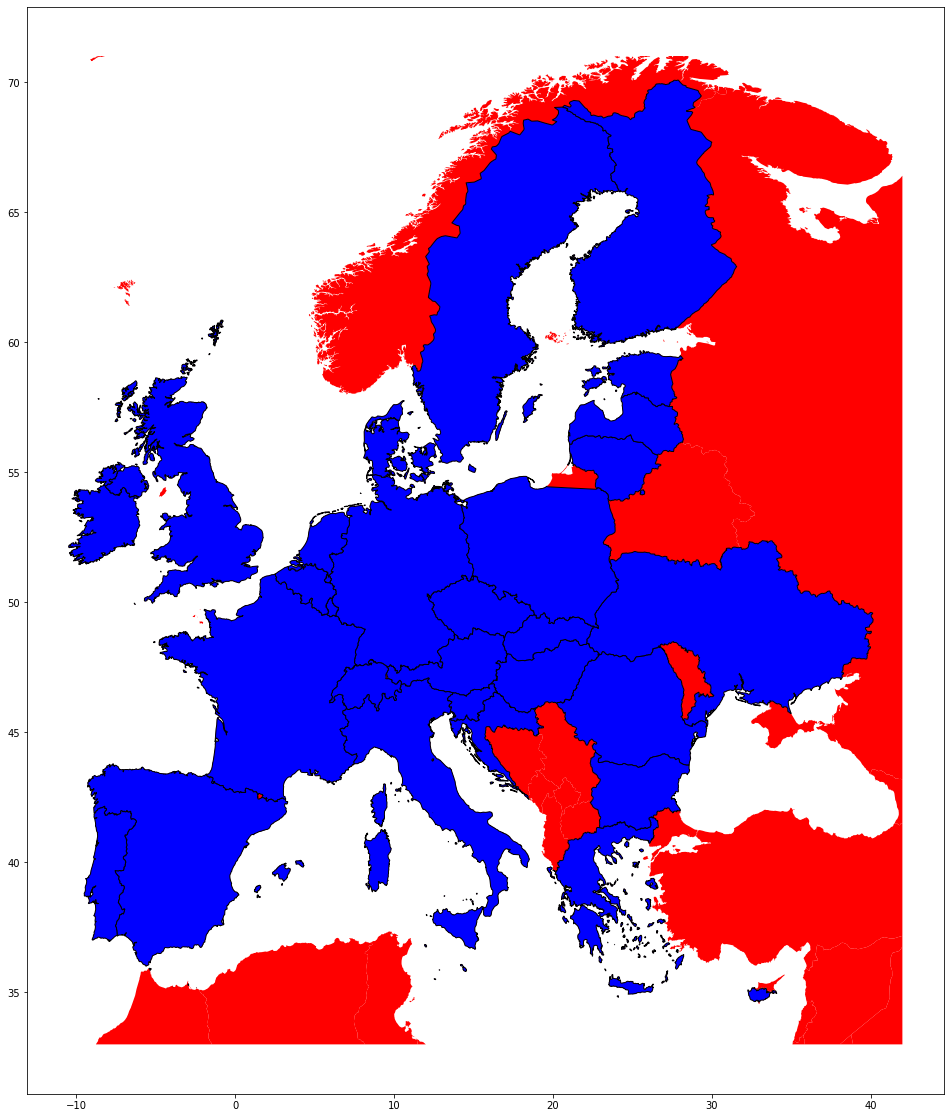

In [21]:
# Read in world data
world_gdf = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]]

# Restrict to countries within defined Europe rectangle
europe_gdf = world_gdf.overlay(europe_frame, how = "intersection")

# Create plot
fig, ax = plt.subplots(figsize = (20,20))

# Plot all countries in Europe rectangle
europe_gdf.plot(
    edgecolor = "none",
    facecolor = "red",
    linewidth = 0,
    ax = ax
)

# Only countries relevant for study
country_gdf = europe_gdf.merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
# Plot them
country_gdf.plot(
    edgecolor = "black",
    facecolor = "blue",
    linewidth = 1,
    ax = ax
)

# Importers
importers_gdf = europe_gdf.merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
# Plot them
country_gdf.plot(
    edgecolor = "black",
    facecolor = "blue",
    linewidth = 1,
    ax = ax
)


### Blank Map

In [7]:
sub_map = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]].explode(index_parts = True).merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
sub_map["area"] = sub_map["geometry"].area
sub_map = sub_map.sort_values("area", ascending = False).groupby("index").first()
sub_map["labelpoint"] = sub_map["geometry"].apply(lambda x: x.representative_point().coords[:][0])
sub_map



/tmp/ipykernel_7502/236715097.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sub_map["area"] = sub_map["geometry"].area


,geometry,area,labelpoint
index,,,
Belgien,"POLYGON ((2.52180 51.08754, 2.54200 51.09687, ...",3.897351,"(4.842477667351959, 50.49821075450008)"
Bulgarien,"POLYGON ((26.33336 41.71304, 26.29491 41.71032...",12.402851,"(25.189682654828538, 42.73222483350001)"
Deutschland,"POLYGON ((13.81572 48.76643, 13.78586 48.72478...",45.658372,"(10.481226124629371, 51.08512583450006)"
Dänemark,"POLYGON ((8.66078 54.89631, 8.66879 54.91352, ...",4.145075,"(9.260474062589893, 56.27433909750005)"
Estland,"POLYGON ((24.30616 57.86819, 24.31666 57.87726...",6.442894,"(25.493169966336133, 58.58848704650006)"
Finnland,"POLYGON ((28.95408 69.02726, 28.83346 68.98447...",61.948035,"(27.41572814067535, 64.94389476100005)"
Frankreich,"POLYGON ((2.52180 51.08754, 2.53703 51.06461, ...",63.314967,"(2.187589111263552, 46.70584981650007)"
Griechenland,"POLYGON ((20.96526 40.84939, 21.11213 40.85394...",11.172670,"(21.95267610558723, 39.070318914500064)"
Irland,"POLYGON ((-7.24710 55.06932, -7.26650 55.06517...",9.297702,"(-7.958241972373972, 53.41606273000005)"


In [8]:
country_map = gpd.read_file("country_shapes.zip")[["ADMIN", "geometry"]].explode(index_parts = True).merge(
    pd.DataFrame.from_dict(
        country_names,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "ADMIN",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
country_map["area"] = country_map["geometry"].area
country_map = country_map.sort_values("area", ascending = False).groupby("index").first()
country_map = country_map.merge(
    output_df_dict["Mapping"],
    left_index = True,
    right_on = ["Region"]
).dissolve(by = "Master").drop(columns = ["Region", "area"])
country_map["labelpoint"] = country_map["geometry"].apply(lambda x: x.representative_point().coords[:][0])
country_map



/tmp/ipykernel_7502/1477639161.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  country_map["area"] = country_map["geometry"].area


,geometry,labelpoint
Master,,
Baltikum,"POLYGON ((26.60383 55.64327, 26.60766 55.61645...","(24.479985900725858, 56.778682763000084)"
Belux,"POLYGON ((6.11056 50.10599, 6.10570 50.09224, ...","(4.971692787433482, 50.47002126050006)"
Deutschland,"POLYGON ((13.81572 48.76643, 13.78586 48.72478...","(10.481226124629371, 51.08512583450006)"
Dänemark,"POLYGON ((8.66078 54.89631, 8.66879 54.91352, ...","(9.260474062589893, 56.27433909750005)"
Frankreich,"POLYGON ((2.52180 51.08754, 2.53703 51.06461, ...","(2.187589111263552, 46.70584981650007)"
Iberia,"POLYGON ((-7.41149 37.18793, -7.40941 37.18374...","(-4.519482298313834, 39.874863999500064)"
Italien,"POLYGON ((7.02208 45.92526, 7.06694 45.89022, ...","(12.692034589438354, 42.49248678850006)"
Malta,"POLYGON ((14.54802 35.89004, 14.56316 35.87002...","(14.438141309500068, 35.895005601000065)"
Niederlande,"POLYGON ((7.19459 53.24502, 7.19747 53.21662, ...","(5.5164067455820485, 52.105632019500035)"


In [9]:
list(zip([0, 0, 20, 20], [0, 20, 20, 0]))

[(0, 0), (0, 20), (20, 20), (20, 0)]

   index                                           geometry
0      0  POLYGON ((0.00000 0.00000, 0.00000 20.00000, 2...


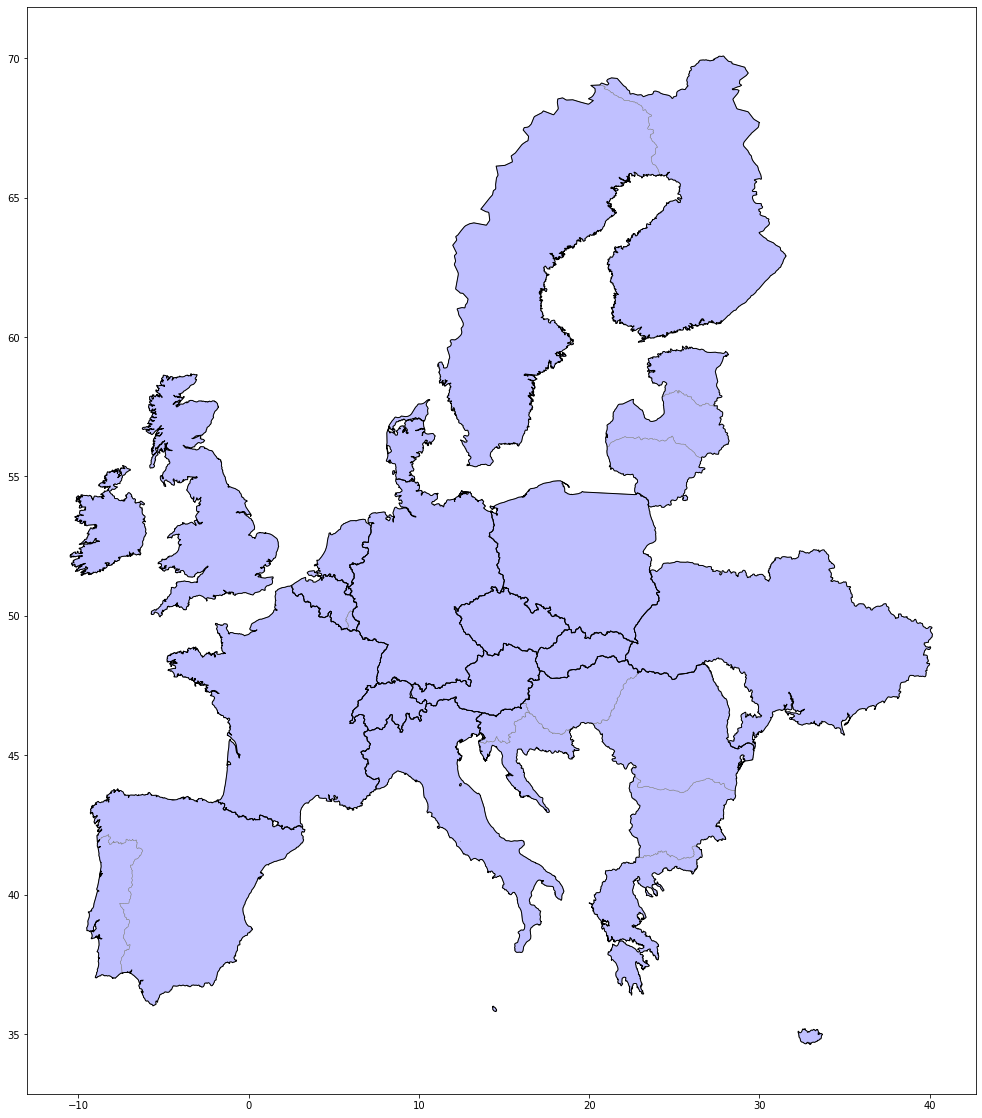

In [10]:
fig, ax = plt.subplots(figsize = (20,20))

sub_map.plot(
    facecolor = (192/255, 192/255, 1),
    edgecolor = "grey",
    linewidth = linewidth/2,
    ax = ax
)

country_map.plot(
    facecolor = "none",
    edgecolor = edgecolor,
    linewidth = linewidth,
    ax = ax
)

'''for idx, row in country_map.iterrows():
    plt.annotate(text = idx,
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )'''



plt.axis("off")

fig.savefig("map_subs_colors_nolabels.png", transparent = True)

### Demand

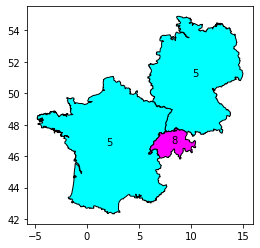

In [11]:
demand_map = country_map.merge(
    output_df_dict["Demand"],
    left_index = True,
    right_index = True
)
demand_map.plot(
    column = "Aug-21",
    cmap = cmap,
    edgecolor = edgecolor,
    linewidth = linewidth
)
for idx, row in demand_map.iterrows():
    plt.annotate(text = row["Aug-21"],
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )

### Prices

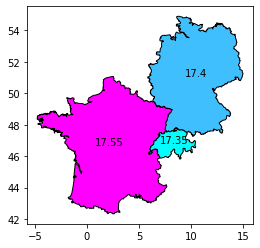

In [118]:
price_map = country_map.merge(
    output_df_dict["Price"],
    left_index = True,
    right_index = True
)
price_map.plot(
    column = "Aug-21",
    cmap = cmap,
    edgecolor = edgecolor,
    linewidth = linewidth
)
for idx, row in price_map.iterrows():
    plt.annotate(text = round(row["Aug-21"],2),
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
list(world[world["name"] == "France"].geometry.values[0])

/tmp/ipykernel_19929/652287095.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(world[world["name"] == "France"].geometry.values[0])
/tmp/ipykernel_19929/652287095.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(world[world["name"] == "France"].geometry.values[0])
